# Project 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Basic

In [20]:
globaltmp = pd.read_csv('global.csv', sep=',')
ny = pd.read_csv('ny.csv', sep=',')

In [4]:
globaltmp.head()

,year,avg_temp,5Y MA,10Y MA
0,1750,8.72,NaN,NaN
1,1751,7.98,NaN,NaN
2,1752,5.78,NaN,NaN
3,1753,8.39,NaN,NaN
4,1754,8.47,7.868,NaN


In [5]:
globaltmp.describe()

,year,avg_temp,5Y MA,10Y MA
count,266.000000,266.000000,262.000000,257.000000
mean,1882.500000,8.369474,8.363260,8.353961
std,76.931788,0.584747,0.490067,0.452483
min,1750.000000,5.780000,7.108000,7.203000
25%,1816.250000,8.082500,8.045000,8.059000
50%,1882.500000,8.375000,8.320000,8.275000
75%,1948.750000,8.707500,8.627000,8.642000
max,2015.000000,9.830000,9.608000,9.594000


In [22]:
ny.describe()

,year,avg_temp,5Y MA,10Y MA
count,271.000000,266.000000,267.000000,262.000000
mean,1878.000000,9.440226,9.402296,9.423841
std,78.375166,1.272883,0.944643,0.655708
min,1743.000000,0.250000,1.130000,6.620000
25%,1810.500000,9.062500,9.041750,9.078250
50%,1878.000000,9.545000,9.402000,9.416000
75%,1945.500000,10.027500,9.929000,9.863500
max,2013.000000,12.160000,11.380000,11.076000


Text(0, 0.5, 'Temperature (ºC)')

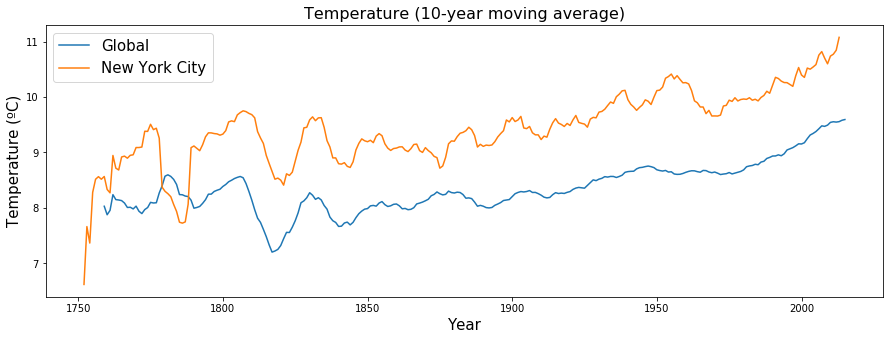

In [39]:
#plt.plot(globaltmp['year'],globaltmp['5Y MA'])
plt.plot(globaltmp['year'],globaltmp['10Y MA'], label='Global')
#plt.plot(ny['year'],ny['5Y MA'], label='ny5')
plt.plot(ny['year'],ny['10Y MA'], label='New York City')
plt.rcParams['figure.figsize'] = [15, 5]
plt.legend(fontsize=15)
plt.title('Temperature (10-year moving average)', fontsize=16)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Temperature (ºC)', fontsize=15)

The average temperature of New York City is higher than the global one in almost all years except in a little window around  1785.
The trend in both cases is really similar with some differences around 1785 and 1880 where there is a peak in the global temperature but a valley in the New York City's temperature. 
The average temperature in both cases is growing since 1850. Before that the temperature fluctuated a lot and there is no clear trend.

## Extra: correlation

let's make a scatter plot to have a better insight

In [42]:
ny2=ny.merge(globaltmp, on='year')

Text(0, 0.5, 'Global')

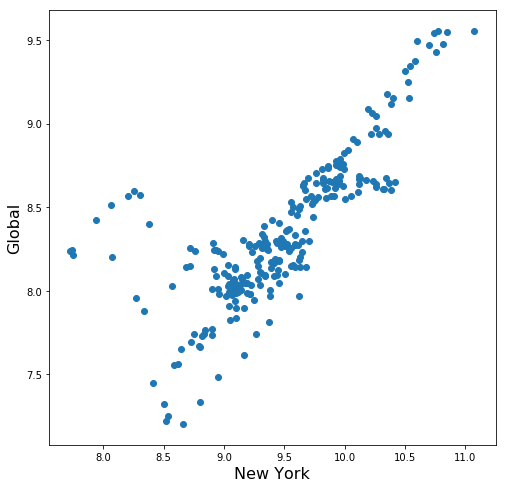

In [76]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.scatter(ny2['10Y MA_x'], ny2['10Y MA_y'])
plt.xlabel('New York', fontsize=16)
plt.ylabel('Global', fontsize=16)

most of the points clearly have a correlation. Let's calculate the pearson coefficient

In [47]:
ny2.corr(method='pearson')

,year,avg_temp_x,5Y MA_x,10Y MA_x,avg_temp_y,5Y MA_y,10Y MA_y
year,1.000000,0.482652,0.689202,0.807291,0.612115,0.708965,0.744770
avg_temp_x,0.482652,1.000000,0.655401,0.595823,0.563413,0.500073,0.515658
5Y MA_x,0.689202,0.655401,1.000000,0.857093,0.581277,0.667459,0.674985
10Y MA_x,0.807291,0.595823,0.857093,1.000000,0.638773,0.747843,0.789318
avg_temp_y,0.612115,0.563413,0.581277,0.638773,1.000000,0.849099,0.805994
5Y MA_y,0.708965,0.500073,0.667459,0.747843,0.849099,1.000000,0.947003
10Y MA_y,0.744770,0.515658,0.674985,0.789318,0.805994,0.947003,1.000000


p=0.79, is clearly a correlation.

## Extra: other cities with the same latitude

In [61]:
chicago = pd.read_csv('chicago.csv', sep=',')
lisbon = pd.read_csv('lisbon.csv', sep=',')
madrid = pd.read_csv('madrid.csv', sep=',')

In [62]:
madrid.head(10)

,year,city,country,avg_temp,5Y MA,10Y MA
0,1743,Madrid,Spain,6.65,NaN,NaN
1,1744,Madrid,Spain,12.41,NaN,NaN
2,1745,Madrid,Spain,5.46,NaN,NaN
3,1746,Madrid,Spain,NaN,NaN,NaN
4,1747,Madrid,Spain,NaN,8.173333,NaN
5,1748,Madrid,Spain,NaN,8.935000,NaN
6,1749,Madrid,Spain,NaN,5.460000,NaN
7,1750,Madrid,Spain,12.01,12.010000,NaN
8,1751,Madrid,Spain,12.71,12.360000,NaN
9,1752,Madrid,Spain,7.07,10.596667,9.385


Text(0, 0.5, 'Temperature (ºC)')

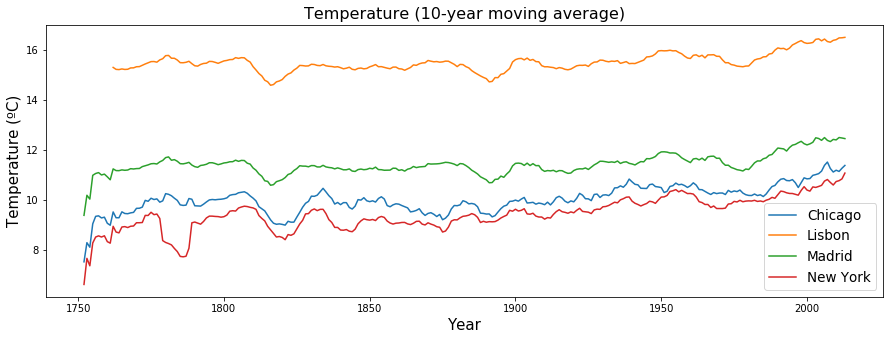

In [73]:
plt.plot(chicago['year'],chicago['10Y MA'], label='Chicago')
plt.plot(lisbon['year'],lisbon['10Y MA'], label='Lisbon')
plt.plot(madrid['year'],madrid['10Y MA'], label='Madrid')
plt.plot(ny['year'],ny['10Y MA'], label='New York')
plt.rcParams['figure.figsize'] = [15, 5]
plt.legend(fontsize=13.5)
plt.title('Temperature (10-year moving average)', fontsize=16)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Temperature (ºC)', fontsize=15)